# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="logo uni.png" width="100" height="100/1.618">
<figure>
    
    UNIVERSITÀ DEGLI STUDI DI TRENTO
    DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA
    A.A. 2022-2023
      
    
*Alunni:*  
Del Dò Giacomo, 221545       
Faccin Francesca, 222028       
Rossato Sofia, 218790 

# **Notebook 1: Pluviometria**

Si prendono in analisi i dati della stazione di Valdagno (Vicenza), situata nel comune di Valdagno ad una quota di 229 m s.l.m..  
Coordinate della stazione (EPSG:4258): 11.30863411; 45.63129614 (longitudine; latitudine).

Di seguito si importa in Jupyter Lab il file 'PluviometriaValdagno' (in estensione .txt) contenente le altezze massime di precipitazione misurate per diverse durate nell'arco di 35 anni. Successivamente si elaborano i dati con lo scopo di individuare le distribuzoni che meglio approssimano la distribuzione reale dei dati.

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
import plotly.express as px

os.getcwd()
os.chdir("/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/1_ESERCITAZIONE")
data = pd.read_csv('PluviometriaValdagno.txt')
map(datetime,data['Anno'])
data = data.set_index('Anno')

Text(0, 0.5, 'Precipitazioni [mm]')

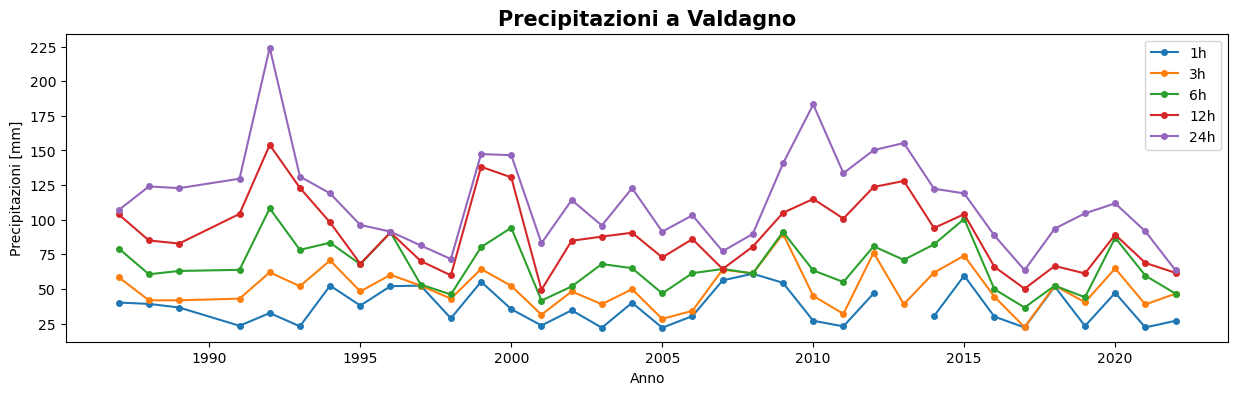

In [2]:
ax = data.plot(style="o-", markersize=4, figsize=(15,4))
ax.grid(linestyle="None")
ax.set_title("Precipitazioni a Valdagno", fontsize=15, fontweight = "bold")
ax.set_xlabel("Anno", fontsize=10)
ax.set_ylabel("Precipitazioni [mm]", fontsize=10)

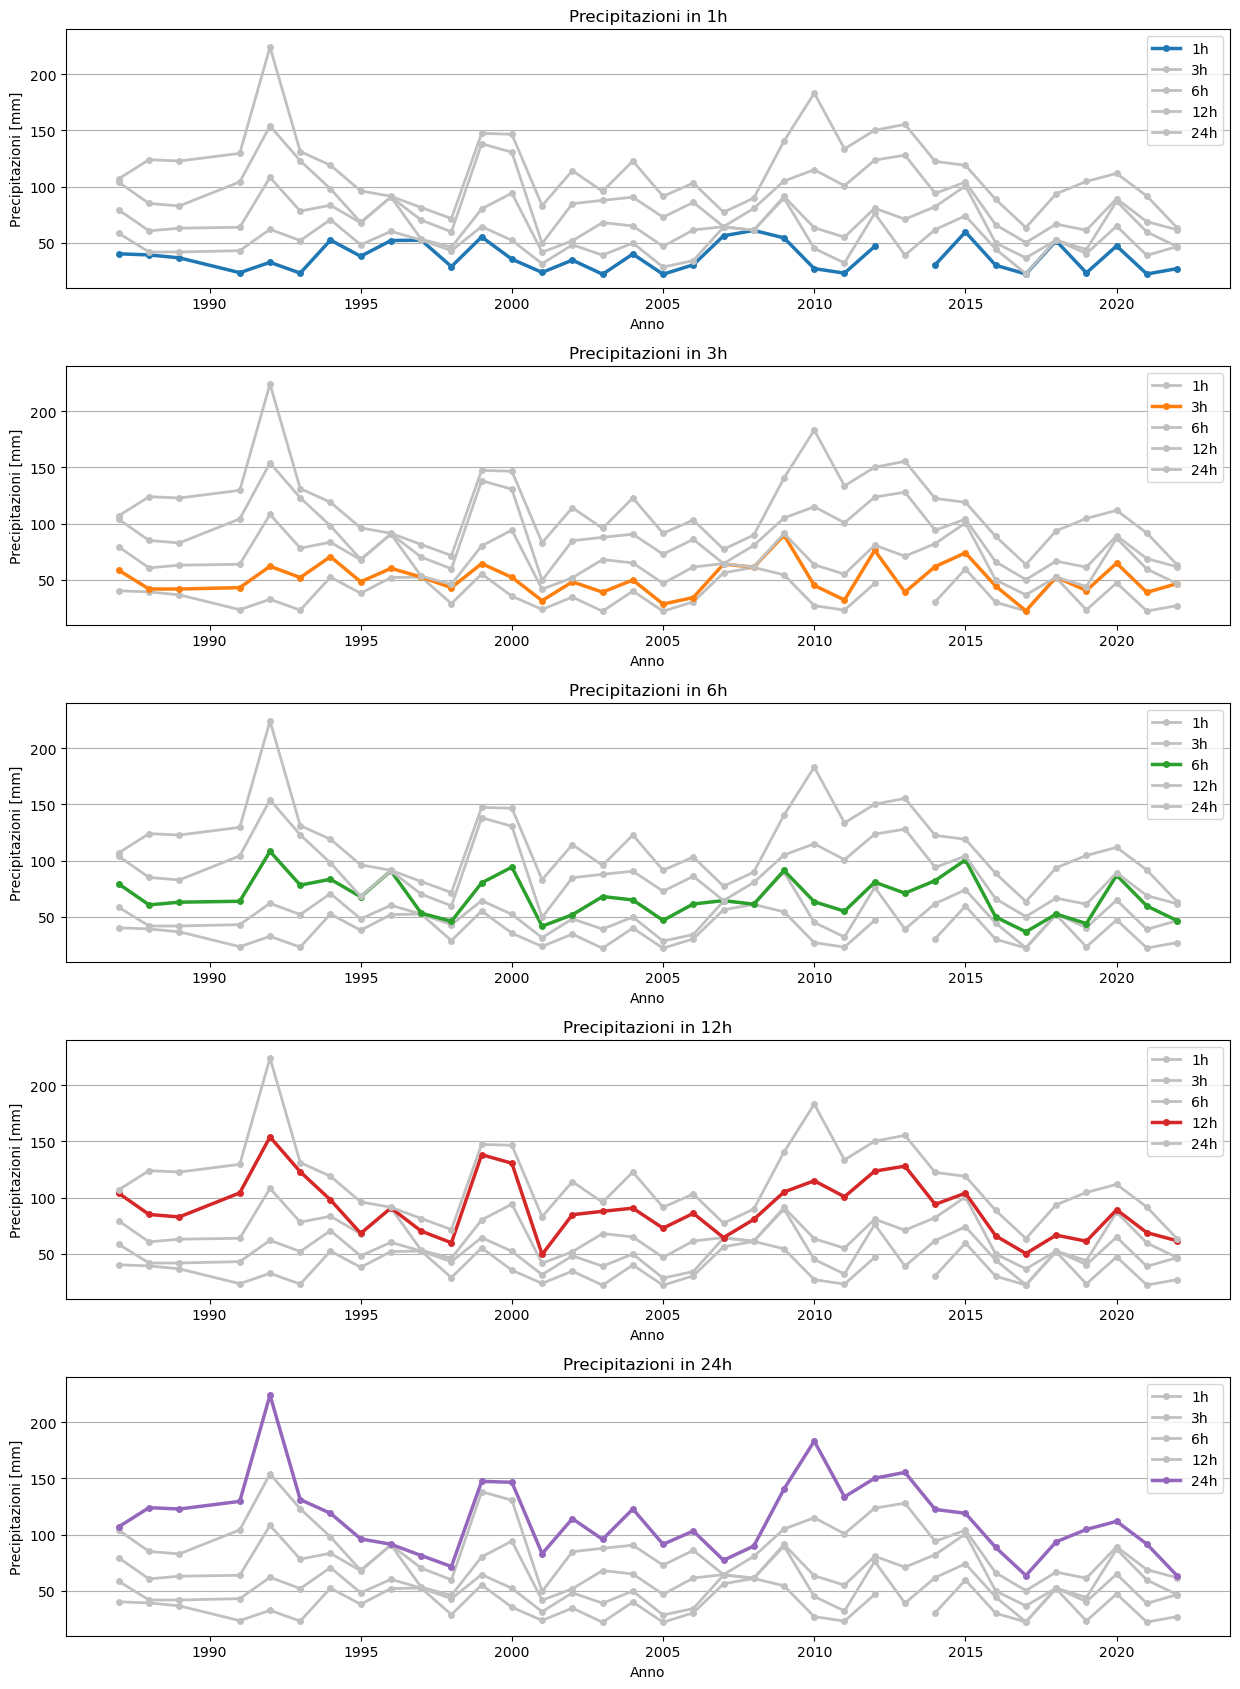

In [3]:
import numpy as np
import seaborn as sns

f  = plt.figure(figsize=(12.5,17))

data1h = data["1h"]
data3h = data["3h"]
data6h = data["6h"]
data12h = data["12h"]
data24h = data["24h"]


ax1 = plt.subplot(5,1,1)
ax1 = data1h.plot(style="o-", markersize=4, linewidth=2.5, color="tab:blue")
ax1 = data3h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax1 = data6h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax1 = data12h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax1 = data24h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax1.title.set_text("Precipitazioni in 1h")
ax1.set_xlabel("Anno")
ax1.set_ylabel("Precipitazioni [mm]")
plt.ylim(10,240)
plt.legend()
plt.grid(axis="y", linestyle='solid')


ax2 = plt.subplot(5,1,2)
ax2 = data1h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax2 = data3h.plot(style="o-", markersize=4, linewidth=2.5, color="tab:orange")
ax2 = data6h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax2 = data12h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax2 = data24h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax2.title.set_text("Precipitazioni in 3h")
ax2.set_xlabel("Anno")
ax2.set_ylabel("Precipitazioni [mm]")
plt.ylim(10,240)
plt.legend()
plt.grid(axis="y", linestyle='solid')


ax3 = plt.subplot(5,1,3)
ax3 = data1h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax3 = data3h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax3 = data6h.plot(style="o-", markersize=4, linewidth=2.5, color="tab:green")
ax3 = data12h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax3 = data24h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax3.title.set_text("Precipitazioni in 6h")
ax3.set_xlabel("Anno")
ax3.set_ylabel("Precipitazioni [mm]")
plt.ylim(10,240)
plt.legend()
plt.grid(axis="y", linestyle='solid')


ax4 = plt.subplot(5,1,4)
ax4 = data1h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax4 = data3h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax4 = data6h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax4 = data12h.plot(style="o-", markersize=4, linewidth=2.5, color="tab:red")
ax4 = data24h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax4.title.set_text("Precipitazioni in 12h")
ax4.set_xlabel("Anno")
ax4.set_ylabel("Precipitazioni [mm]")
plt.ylim(10,240)
plt.legend()
plt.grid(axis="y", linestyle='solid')


ax5 = plt.subplot(5,1,5)
ax5 = data1h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax5 = data3h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax5 = data6h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax5 = data12h.plot(style="o-", markersize=4, linewidth=2, color="silver")
ax5 = data24h.plot(style="o-", markersize=4, linewidth=2.5, color="tab:purple")
ax5.set_xlabel("Anno")
ax5.set_ylabel("Precipitazioni [mm]")
ax5.title.set_text("Precipitazioni in 24h")
plt.ylim(10,240)
plt.legend()
plt.grid(axis="y", linestyle='solid')

plt.tight_layout()

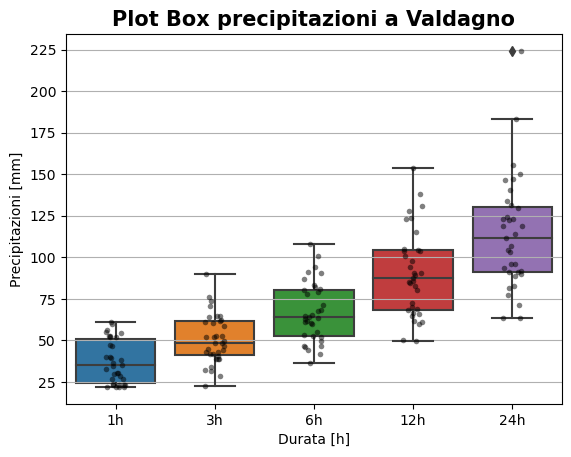

In [4]:
df = pd.DataFrame(data=data, columns=["1h", "3h", "6h", "12h", "24h"])
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=colors)
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df), marker="o",size=4, alpha=0.5, color="black")
plt.grid(axis="y", linestyle='solid')
boxplot.axes.set_title("Plot Box precipitazioni a Valdagno", fontsize=15, fontweight = "bold")
boxplot.set_xlabel("Durata [h]", fontsize=10)
boxplot.set_ylabel("Precipitazioni [mm]", fontsize=10)
plt.show()

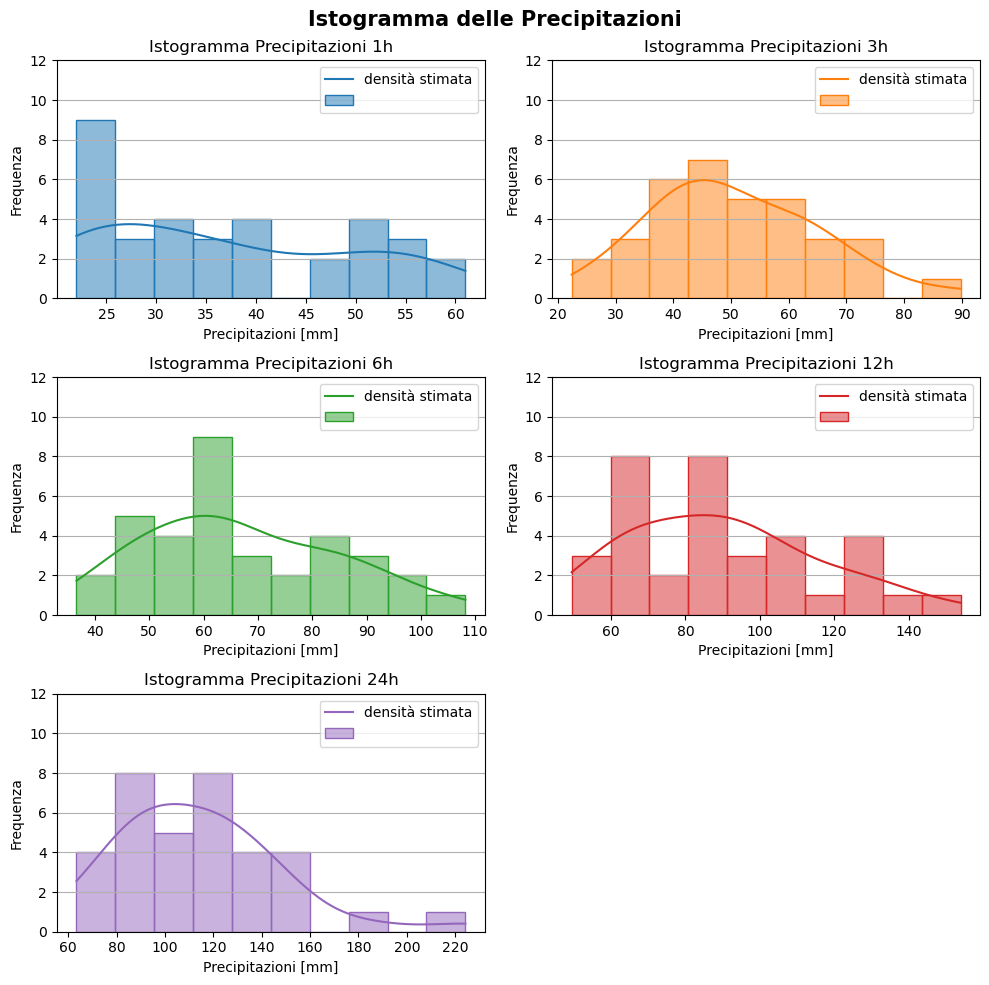

In [5]:
f  = plt.figure(figsize=(10,10))
f.suptitle("Istogramma delle Precipitazioni", fontsize=15, fontweight = "bold")
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

ax1 = plt.subplot(3,2,1)
ax1 = sns.histplot(data["1h"], bins=10, kde=True, color='tab:blue', edgecolor="tab:blue", legend=True)
ax1.title.set_text("Istogramma Precipitazioni 1h")
ax1.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax1.set_ylabel("Frequenza", fontsize=10)
plt.ylim(0, 12) 
plt.legend(("densità stimata",""), loc="upper right")
plt.grid(axis="y", linestyle='solid')

ax2 = plt.subplot(3,2,2)
ax2 = sns.histplot(data["3h"], bins=10, kde=True, color='tab:orange', edgecolor="tab:orange")
ax2.title.set_text("Istogramma Precipitazioni 3h")
ax2.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax2.set_ylabel("Frequenza", fontsize=10)
plt.ylim(0, 12) 
plt.legend(("densità stimata",""), loc="upper right")
plt.grid(axis="y", linestyle='solid')

ax3 = plt.subplot(3,2,3)
ax3 = sns.histplot(data["6h"], bins=10, kde=True, color='tab:green', edgecolor="tab:green")
ax3.title.set_text("Istogramma Precipitazioni 6h")
ax3.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax3.set_ylabel("Frequenza", fontsize=10)
plt.ylim(0, 12)
plt.legend(("densità stimata",""), loc="upper right")
plt.grid(axis="y", linestyle='solid')

ax4 = plt.subplot(3,2,4)
ax4 = sns.histplot(data["12h"], bins=10, kde=True, color='tab:red', edgecolor="tab:red")
ax4.title.set_text("Istogramma Precipitazioni 12h")
ax4.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax4.set_ylabel("Frequenza", fontsize=10)
plt.ylim(0, 12) 
plt.legend(("densità stimata",""),loc="upper right")
plt.grid(axis="y", linestyle='solid')

ax5 = plt.subplot(3,2,5)
ax5 = sns.histplot(data["24h"], bins=10, kde=True, color='tab:purple', edgecolor="tab:purple")
ax5.title.set_text("Istogramma Precipitazioni 24h")
ax5.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax5.set_ylabel("Frequenza", fontsize=10)
plt.ylim(0, 12) 
plt.legend(("densità stimata", ""), loc="upper right")
plt.grid(axis="y", linestyle='solid')

plt.tight_layout()

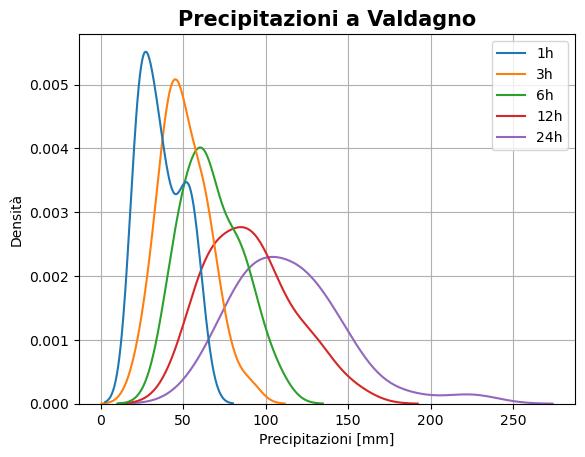

In [6]:
ax = sns.kdeplot(data[["1h","3h","6h","12h","24h"]])
ax.set_title("Precipitazioni a Valdagno", fontsize=15, fontweight = "bold")
ax.set_ylabel("Densità", fontsize=10)
ax.set_xlabel("Precipitazioni [mm]", fontsize=10)
ax.grid(True)